In [2]:
## importing neccesary packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from scipy.stats import ttest_ind
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

## Loading the Dataset

In [3]:
df = pd.read_csv('Faults.csv' , delimiter= '\t')

In [4]:
df

,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1.3,0.1,0.2,0.3,0.4,0.5,0.6
0,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
1,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
2,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
3,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
4,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1936,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1937,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1938,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [5]:
## The column names are in different csv file
df_columns  = pd.read_csv('Faults27x7_var.csv')
df_columns

,X_Minimum
0,X_Maximum
1,Y_Minimum
2,Y_Maximum
3,Pixels_Areas
4,X_Perimeter
5,Y_Perimeter
6,Sum_of_Luminosity
7,Minimum_of_Luminosity
8,Maximum_of_Luminosity
9,Length_of_Conveyer


## Data Preprocessing

In [6]:
## combining both csv file to have a proper column name and the dataset followed by it
t_array = df_columns.to_numpy() 
t1 = df_columns.columns
t_columns1 = np.append(t1, t_array)

In [7]:
x = df.columns 
x = np.reshape(x , [1,34])
y = df.to_numpy()
np.shape(y)
t_columns = np.append(x , y)

In [8]:
p = pd.DataFrame(np.reshape(t_columns , [1941 ,34]), columns = t_columns1 )
p

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1.3,0.1,0.2,0.3,0.4,0.5,0.6
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.7931,-0.1756,0.2984,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.6667,-0.1228,0.215,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.8444,-0.1568,0.5212,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9338,-0.1992,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119.0,141.0,...,-0.4286,0.0026,0.7254,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112.0,133.0,...,-0.4516,-0.0582,0.8173,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120.0,140.0,...,-0.4828,0.0052,0.7079,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117.0,140.0,...,-0.0606,-0.0171,0.9919,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# checking the datatypes of the each attribute
p.dtypes

X_Minimum                object
X_Maximum                object
Y_Minimum                object
Y_Maximum                object
Pixels_Areas             object
X_Perimeter              object
Y_Perimeter              object
Sum_of_Luminosity        object
Minimum_of_Luminosity    object
Maximum_of_Luminosity    object
Length_of_Conveyer       object
TypeOfSteel_A300         object
TypeOfSteel_A400         object
Steel_Plate_Thickness    object
Edges_Index              object
Empty_Index              object
Square_Index             object
Outside_X_Index          object
Edges_X_Index            object
Edges_Y_Index            object
Outside_Global_Index     object
LogOfAreas               object
Log_X_Index              object
Log_Y_Index              object
Orientation_Index        object
Luminosity_Index         object
SigmoidOfAreas           object
Pastry                   object
Z_Scratch                object
K_Scatch                 object
Stains                   object
Dirtines

In [10]:
p[t_columns1] = p[t_columns1].astype(float)
p.dtypes

X_Minimum                float64
X_Maximum                float64
Y_Minimum                float64
Y_Maximum                float64
Pixels_Areas             float64
X_Perimeter              float64
Y_Perimeter              float64
Sum_of_Luminosity        float64
Minimum_of_Luminosity    float64
Maximum_of_Luminosity    float64
Length_of_Conveyer       float64
TypeOfSteel_A300         float64
TypeOfSteel_A400         float64
Steel_Plate_Thickness    float64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                   float64
Z_Scratch                float64
K_Scatch                 float64
Stains    

In [12]:
encoded_columns = ['Pastry', 'Z_Scratch', 'K_Scatch' , 'Stains' , 'Dirtiness' , 'Bumps', 'Other_Faults']

In [13]:
## making sure that there are only binary values in the label dummies
def encode_units(x):
    if x >= 1:
        return 1 
    else:
        return 0
    
p[encoded_columns] = p[encoded_columns].applymap(encode_units)

/var/folders/6j/55pyw_k56_j1hwx5q9jq1xqr0000gn/T/ipykernel_1859/1346669991.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p[encoded_columns] = p[encoded_columns].applymap(encode_units)


In [14]:
p

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119.0,141.0,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112.0,133.0,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120.0,140.0,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117.0,140.0,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [15]:
## changing one hot encoder of the type of faults to label encoder
label_encoding = p[encoded_columns].to_numpy()

labels = np.where(label_encoding == 1)[1]

p['labels'] = labels

p = p.drop(columns= encoded_columns)

In [16]:
p

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,labels
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.4706,1.1000,1.2,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119.0,141.0,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,6
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112.0,133.0,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,6
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120.0,140.0,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,6
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117.0,140.0,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,6


In [17]:
## changing one hot encoder of the type of steel to label encoder
type = p[['TypeOfSteel_A300','TypeOfSteel_A400']].to_numpy()

labels = np.where(type == 1)[1]
p['typeofsteel'] = labels
p = p.drop(columns= ['TypeOfSteel_A300','TypeOfSteel_A400'])

In [18]:
p

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,labels,typeofsteel
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.1000,1.2,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0,0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0,0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0,0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0,1
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119.0,141.0,...,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,6,1
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112.0,133.0,...,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,6,1
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120.0,140.0,...,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,6,1
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117.0,140.0,...,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,6,1


In [19]:
## checking for null values in the data set 
p.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
labels                   0
typeofsteel              0
dtype: int64

## EDA

In [233]:
# displaying the count of 2 types of steel 
p[['typeofsteel']].value_counts()

typeofsteel
1              1164
0               777
Name: count, dtype: int64

In [20]:
# displaying the count of 2 types of steel wirth respect to steel faults
results = p.groupby('typeofsteel')['labels'].value_counts().reset_index(name='count_column')
results

,typeofsteel,labels,count_column
0,0,5,279
1,0,6,266
2,0,1,172
3,0,0,49
4,0,4,9
5,0,2,1
6,0,3,1
7,1,6,407
8,1,2,390
9,1,5,123


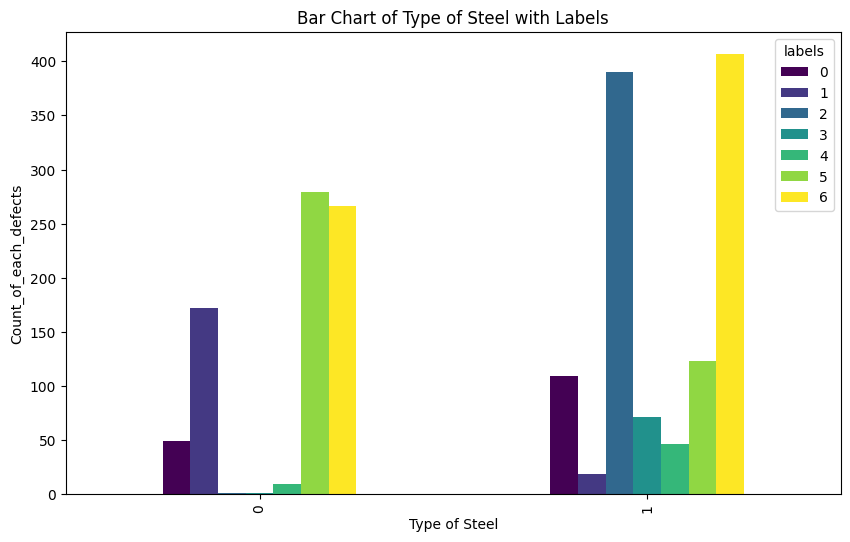

In [21]:
## plotting the above count
pivot_df = results.pivot(index='typeofsteel', columns='labels', values='count_column')
ax = pivot_df.plot(kind='bar', colormap='viridis', figsize=(10, 6))

plt.xlabel('Type of Steel')
plt.ylabel('Count_of_each_defects')
plt.title('Bar Chart of Type of Steel with Labels')

plt.show()

In [22]:
## seperating X and Y variables from the dataset
Y = p['labels']
X = p.drop(columns='labels')

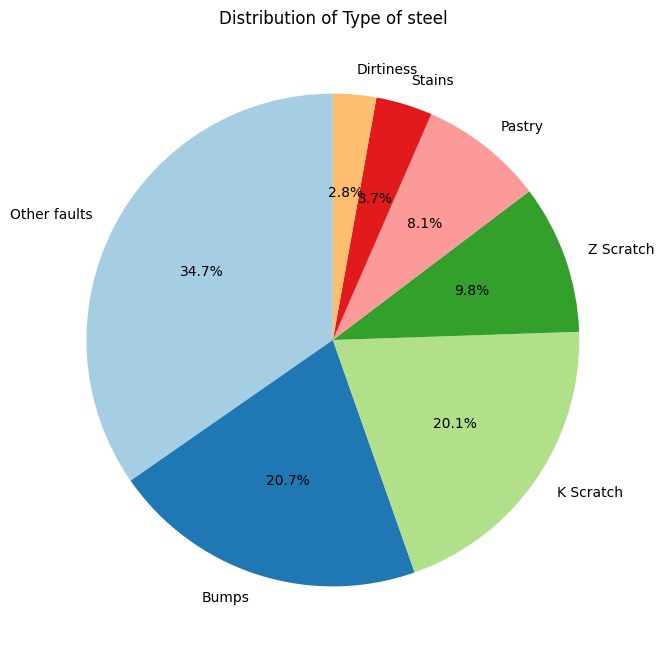

In [23]:
## displaying the distribution of different steel faults in the dataset
labels = ['Other faults', 'Bumps', 'K Scratch', 'Z Scratch', 'Pastry' , 'Stains' , 'Dirtiness']
plt.figure(figsize=(8, 8))
plt.pie(Y.value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Type of steel')
plt.show()

## Feature Selection

In [24]:
## Take mean of x min and max , y min and max 
X['X_mean'] = X[['X_Minimum', 'X_Maximum']].mean(axis=1)

X['Y_mean'] = X[['Y_Minimum', 'Y_Maximum']].mean(axis=1)


X = X.drop(columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum','Y_Maximum'])
X

,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,...,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,typeofsteel,X_mean,Y_mean
0,267.0,17.0,44.0,24220.0,76.0,108.0,1687.0,80.0,0.0498,0.2415,...,1.2,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0,46.0,270922.0
1,108.0,10.0,30.0,11397.0,84.0,123.0,1687.0,80.0,0.7647,0.3793,...,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0,648.0,2538093.5
2,71.0,8.0,19.0,7972.0,99.0,125.0,1623.0,100.0,0.9710,0.3426,...,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0,832.0,1553922.0
3,176.0,13.0,45.0,18996.0,99.0,126.0,1353.0,290.0,0.7287,0.4413,...,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,856.5,369392.5
4,2409.0,60.0,260.0,246930.0,37.0,126.0,1353.0,185.0,0.0695,0.4486,...,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,1297.5,498206.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,273.0,54.0,22.0,35033.0,119.0,141.0,1360.0,40.0,0.3662,0.3906,...,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,1,263.0,325788.0
1937,287.0,44.0,24.0,34599.0,112.0,133.0,1360.0,40.0,0.2118,0.4554,...,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,1,159.5,340589.5
1938,292.0,40.0,22.0,37572.0,120.0,140.0,1360.0,40.0,0.2132,0.3287,...,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,1,159.5,386786.5
1939,419.0,97.0,47.0,52715.0,117.0,140.0,1360.0,40.0,0.2015,0.5904,...,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,1,153.5,422512.5


In [26]:
## calculate varince to remove attributes that have very less variance
selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(X)
columns = X.columns[selector.get_support()]
## remaining columns
columns 

Index(['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'SigmoidOfAreas',
       'typeofsteel', 'X_mean', 'Y_mean'],
      dtype='object')

/var/folders/6j/55pyw_k56_j1hwx5q9jq1xqr0000gn/T/ipykernel_1859/483054938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='labels', y='Steel_Plate_Thickness', data=p, palette='Pastel1')


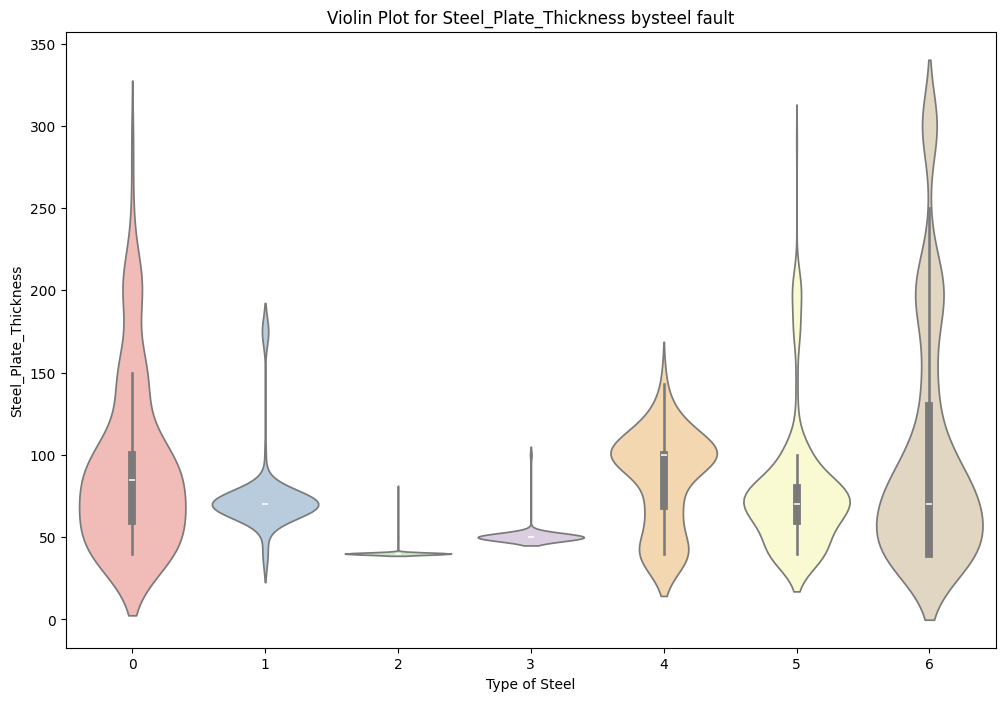

In [27]:
## plaoting the steel plate thickness to the steel sault
plt.figure(figsize=(12, 8))
sns.violinplot(x='labels', y='Steel_Plate_Thickness', data=p, palette='Pastel1')
plt.title('Violin Plot for Steel_Plate_Thickness bysteel fault')
plt.xlabel('Type of Steel')
plt.ylabel('Steel_Plate_Thickness')
plt.show()

In [28]:
## the attribtes remaining after using variance threshold
X = X[columns] 

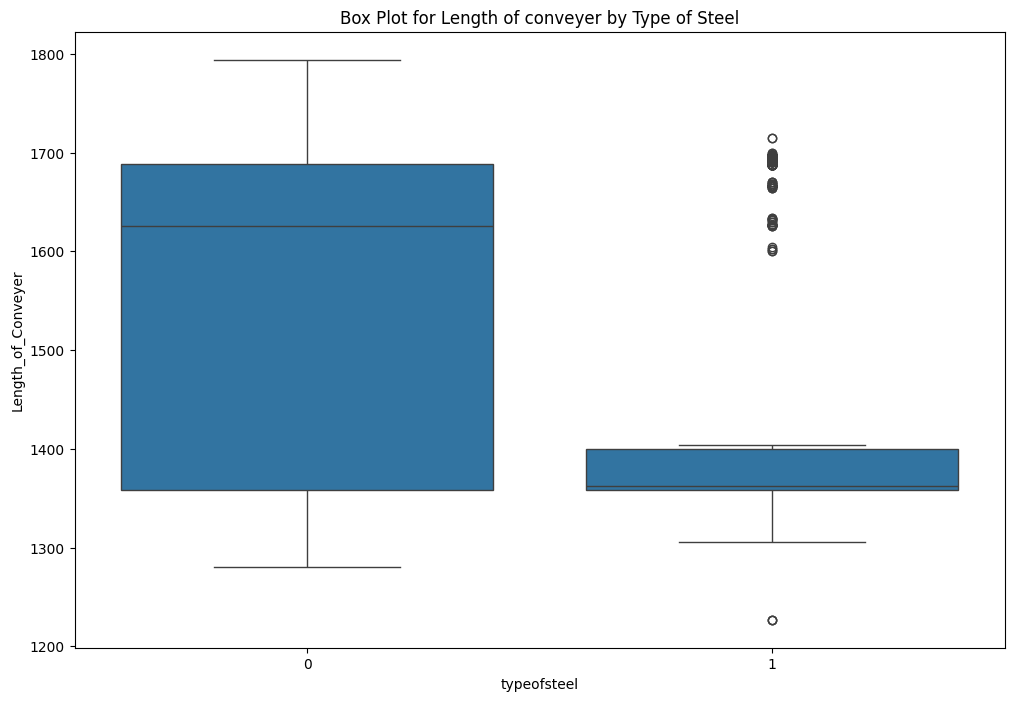

In [29]:
## plotting box plot for the length of conveyer by type of steel
plt.figure(figsize=(12, 8))
sns.boxplot(x=X['typeofsteel'], y=X['Length_of_Conveyer'], data=df)
plt.title('Box Plot for Length of conveyer by Type of Steel')
plt.show()

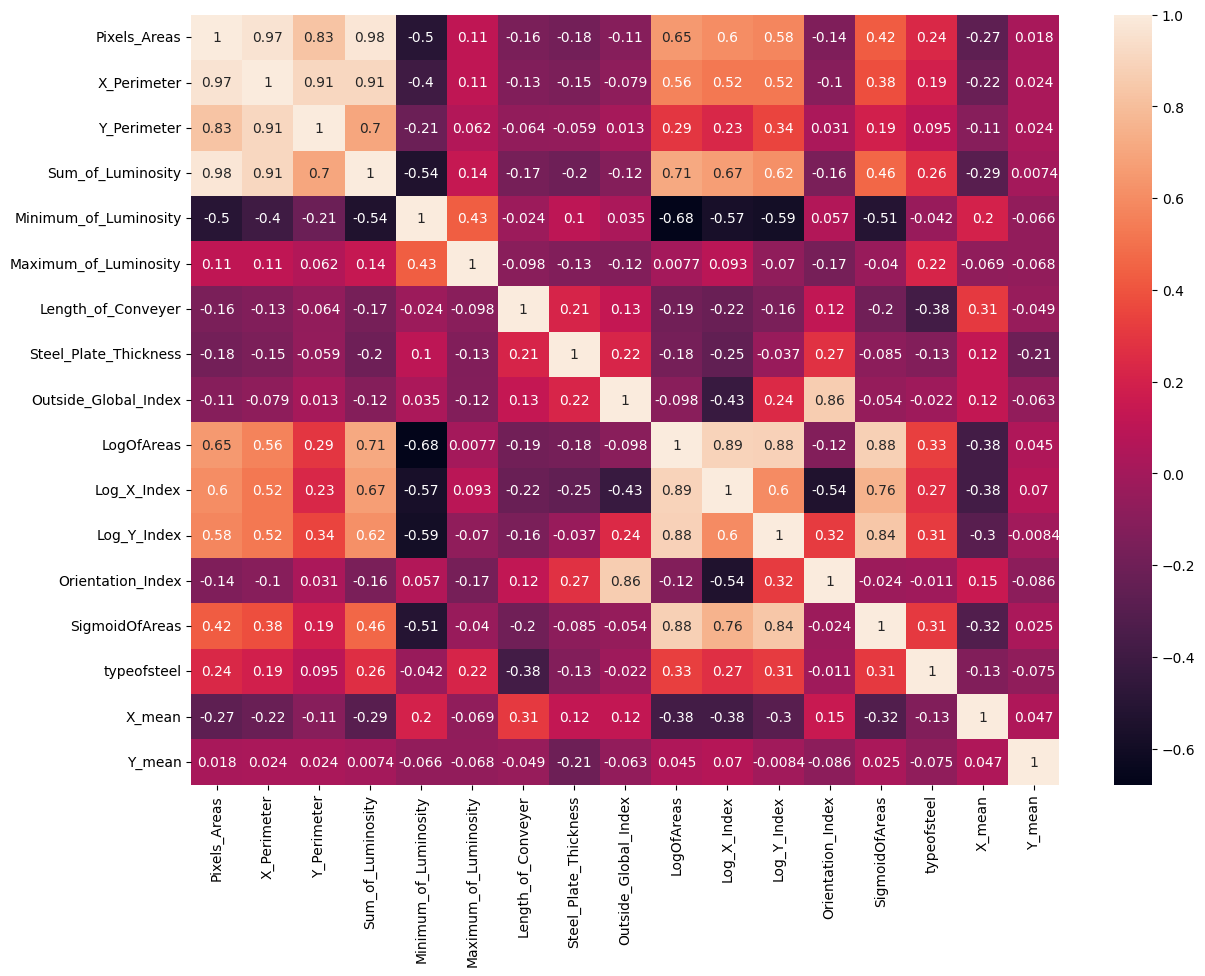

In [30]:
## plotting the correlation matrix of the attributes
plt.figure(figsize=(14,10))

corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [31]:
## using correlation threshold to remvoe highly correlated features 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(X, 0.85)
len(set(corr_features))

7

In [34]:
## highly correlated features
corr_features

{'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'SigmoidOfAreas',
 'Sum_of_Luminosity',
 'X_Perimeter',
 'Y_Perimeter'}

In [35]:
X = X.drop(columns = ['Y_Perimeter' , 'X_Perimeter', 'Sum_of_Luminosity', 'SigmoidOfAreas', 'Log_Y_Index' , 'Log_X_Index', 'Orientation_Index'])

In [36]:
X

,Pixels_Areas,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Outside_Global_Index,LogOfAreas,typeofsteel,X_mean,Y_mean
0,267.0,76.0,108.0,1687.0,80.0,1.2,2.4265,0,46.0,270922.0
1,108.0,84.0,123.0,1687.0,80.0,1.0,2.0334,0,648.0,2538093.5
2,71.0,99.0,125.0,1623.0,100.0,1.0,1.8513,0,832.0,1553922.0
3,176.0,99.0,126.0,1353.0,290.0,1.0,2.2455,1,856.5,369392.5
4,2409.0,37.0,126.0,1353.0,185.0,1.0,3.3818,1,1297.5,498206.5
...,...,...,...,...,...,...,...,...,...,...
1936,273.0,119.0,141.0,1360.0,40.0,0.0,2.4362,1,263.0,325788.0
1937,287.0,112.0,133.0,1360.0,40.0,0.0,2.4579,1,159.5,340589.5
1938,292.0,120.0,140.0,1360.0,40.0,0.0,2.4654,1,159.5,386786.5
1939,419.0,117.0,140.0,1360.0,40.0,0.0,2.6222,1,153.5,422512.5


In [37]:
## correlation of each varialbe with the output label
X['lables'] = Y

correlation_matrix = X.corr()
feature_scores = correlation_matrix['lables'].sort_values(ascending=False)

print(feature_scores)

X = X.drop(columns = ['lables'])

lables                   1.000000
Minimum_of_Luminosity    0.289873
X_mean                   0.281679
Steel_Plate_Thickness    0.248673
Length_of_Conveyer       0.206933
Maximum_of_Luminosity    0.018774
Y_mean                   0.000099
Outside_Global_Index    -0.014421
typeofsteel             -0.107571
Pixels_Areas            -0.239093
LogOfAreas              -0.311516
Name: lables, dtype: float64


In [38]:
X

,Pixels_Areas,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Outside_Global_Index,LogOfAreas,typeofsteel,X_mean,Y_mean
0,267.0,76.0,108.0,1687.0,80.0,1.2,2.4265,0,46.0,270922.0
1,108.0,84.0,123.0,1687.0,80.0,1.0,2.0334,0,648.0,2538093.5
2,71.0,99.0,125.0,1623.0,100.0,1.0,1.8513,0,832.0,1553922.0
3,176.0,99.0,126.0,1353.0,290.0,1.0,2.2455,1,856.5,369392.5
4,2409.0,37.0,126.0,1353.0,185.0,1.0,3.3818,1,1297.5,498206.5
...,...,...,...,...,...,...,...,...,...,...
1936,273.0,119.0,141.0,1360.0,40.0,0.0,2.4362,1,263.0,325788.0
1937,287.0,112.0,133.0,1360.0,40.0,0.0,2.4579,1,159.5,340589.5
1938,292.0,120.0,140.0,1360.0,40.0,0.0,2.4654,1,159.5,386786.5
1939,419.0,117.0,140.0,1360.0,40.0,0.0,2.6222,1,153.5,422512.5


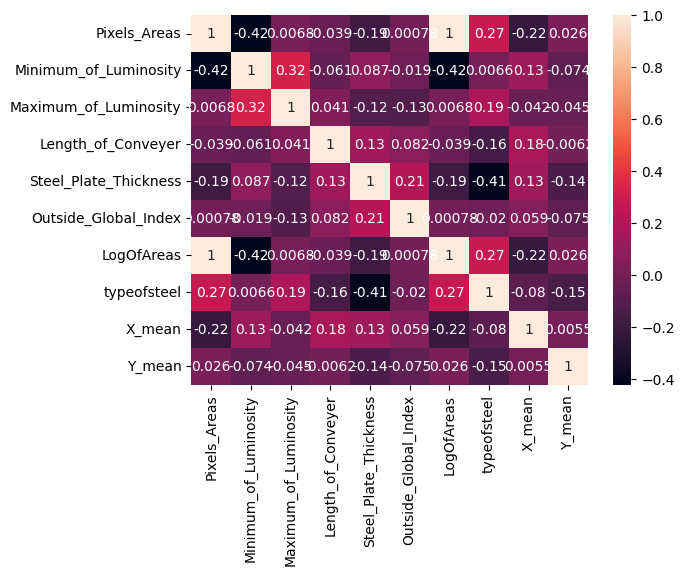

In [40]:
## non linear correlation of attributes
kendall_corr = X.corr(method='kendall')

sns.heatmap(kendall_corr, annot=True)
plt.show()

## Hypothesis Testing 

In [43]:
## H0: Mean pixel area significantly does not differ in both the type of steel
steel_a300 = X[X["typeofsteel"] == 0]["Pixels_Areas"]
steel_a400 = X[X["typeofsteel"] == 1]["Pixels_Areas"]

In [44]:
steel_a300

0       267.0
1       108.0
2        71.0
44       98.0
45      267.0
        ...  
1901     67.0
1902     76.0
1903     73.0
1904    102.0
1940    103.0
Name: Pixels_Areas, Length: 777, dtype: float64

In [45]:
t_statistic, p_value = ttest_ind(steel_a300, steel_a400, equal_var=True)

In [46]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Mean Pixels_Areas differs significantly between TypeOfSteel_A300 and TypeOfSteel_A400.")
else:
    print("Fail to reject H0: No evidence of significant difference in mean Pixels_Areas between TypeOfSteel_A300 and TypeOfSteel_A400. (p-value > 0.05)")

T-statistic: -10.674509675697276
P-value: 6.903284090559862e-26
Reject H0: Mean Pixels_Areas differs significantly between TypeOfSteel_A300 and TypeOfSteel_A400.


In [47]:
X_copy = X.copy()

In [48]:
## 2 ,## H0: Thickness of steel doesnot affect Bump


def encode_units(x):
    if x == 5:
        return 1 
    else:
        return 0

X_copy['labels'] = Y

selected_columns = ['labels']

X_copy['labels'] = X_copy[selected_columns].applymap(encode_units)

/var/folders/6j/55pyw_k56_j1hwx5q9jq1xqr0000gn/T/ipykernel_1859/1282028249.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_copy['labels'] = X_copy[selected_columns].applymap(encode_units)


In [49]:
# Create a contingency table
table = pd.crosstab(X_copy['Steel_Plate_Thickness'], X_copy['labels'], margins=True)

# Perform the chi-square test
chi2_statistic, p_value, expected_counts, observed_counts = chi2_contingency(table)

# Print results
print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Steel thickness is associated with the presence of bumps.")
else:
    print("Fail to reject H0: No evidence of association between thickness and bump presence.")

Chi-square statistic: 371.4770886618595
P-value: 1.459040457354092e-51
Reject H0: Steel thickness is associated with the presence of bumps.


In [50]:
## H0: Luminosity is not affecedt by any variable
from scipy.stats import f_oneway

steel_groups = {steel: X_copy[X_copy["typeofsteel"] == steel] for steel in X_copy["typeofsteel"].unique()}

f_statistic, p_value = f_oneway(*steel_groups.values())

print("Two-way ANOVA:")
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

if all(p_value) < 0.05:
    print("Reject H0: At least one variable affects luminosity.")
else:
    print("Fail to reject H0: No evidence of significant effects.")


Two-way ANOVA:
F-statistic: [113.94515682   3.4343363   95.20579722 324.32131471  31.10338107
   0.97327797 236.34122269          inf  32.76486632  11.01484674
 200.87307207], p-value: [6.90328409e-26 6.40060588e-02 5.44954107e-22 3.62147067e-67
 2.78962127e-08 3.23987107e-01 2.05188923e-50 0.00000000e+00
 1.20255032e-08 9.20582873e-04 1.84162561e-43]
Reject H0: At least one variable affects luminosity.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [51]:
## The 'Length_of_Conveyer' does not have a significant effect on 'Pixels_Areas'.

X_new = sm.add_constant(X['Length_of_Conveyer'])

# Fit the linear regression model
model = sm.OLS(X['Pixels_Areas'], X_new).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Pixels_Areas   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     48.27
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           5.05e-12
Time:                        16:52:10   Log-Likelihood:                -19326.
No. Observations:                1941   AIC:                         3.866e+04
Df Residuals:                    1939   BIC:                         3.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.002e+04   1175

In [52]:
# Print the coefficient and p-value for 'Length_of_Conveyer'

print("Pvalue:", model.pvalues['Length_of_Conveyer'])


if model.pvalues['Length_of_Conveyer'] < 0.05 :
    print("Reject H0: Length of conveyer has significant effect on Pixel Areas")
else:
    print("Fail to Reject H0: Length of conveyer does not have significant effect on Pixel Areas")


Pvalue: 5.049837410468857e-12
Reject H0: Length of conveyer has significant effect on Pixel Areas


## Modal Training  

In [53]:
## spliting data sset as train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [68]:
# parameters to be optimised for random forest
param_grid = {
    'n_estimators': [100 , 120] , 
    'max_depth': [5, 10, 20], 
    'min_samples_leaf': [5, 10, 20],
    'random_state': [42]  
}


In [69]:
model1 = RandomForestClassifier()
grid_search = GridSearchCV(model1 , param_grid, cv=5, scoring='accuracy') # 5-fold cross-validation for accuracy

In [70]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [100, 120], 'random_state': [42]},
             scoring='accuracy')

In [71]:
cv_results = grid_search.cv_results_
print(cv_results)


{'mean_fit_time': array([0.07539797, 0.09567232, 0.07340741, 0.08343949, 0.06856942,
       0.08319063, 0.07863603, 0.09442558, 0.07899876, 0.09287972,
       0.07328343, 0.08798852, 0.07974467, 0.09616838, 0.07580385,
       0.09106245, 0.07228632, 0.08672209]), 'std_fit_time': array([0.007011  , 0.02187143, 0.00339157, 0.0010741 , 0.00101106,
       0.00108705, 0.00046332, 0.00081955, 0.00251171, 0.00065744,
       0.00038892, 0.00178052, 0.00082886, 0.00160668, 0.00061099,
       0.0007779 , 0.00060331, 0.00064227]), 'mean_score_time': array([0.00353627, 0.00361171, 0.00349121, 0.00365415, 0.00319738,
       0.00377545, 0.00338435, 0.00396848, 0.00339003, 0.00409636,
       0.00341396, 0.00378809, 0.00349379, 0.00385695, 0.00319996,
       0.00375261, 0.00323925, 0.0036469 ]), 'std_score_time': array([6.90803512e-04, 5.41712196e-05, 1.90380924e-04, 1.57108878e-04,
       9.88327576e-05, 1.13493414e-04, 1.69510144e-04, 8.10004447e-05,
       1.13695359e-04, 1.49004295e-04, 9.26236265

In [72]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8130360205831904
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44        37
           1       0.94      0.94      0.94        63
           2       0.96      0.96      0.96       120
           3       1.00      0.91      0.95        23
           4       0.76      0.87      0.81        15
           5       0.68      0.70      0.69       110
           6       0.79      0.81      0.80       215

    accuracy                           0.81       583
   macro avg       0.81      0.80      0.80       583
weighted avg       0.81      0.81      0.81       583



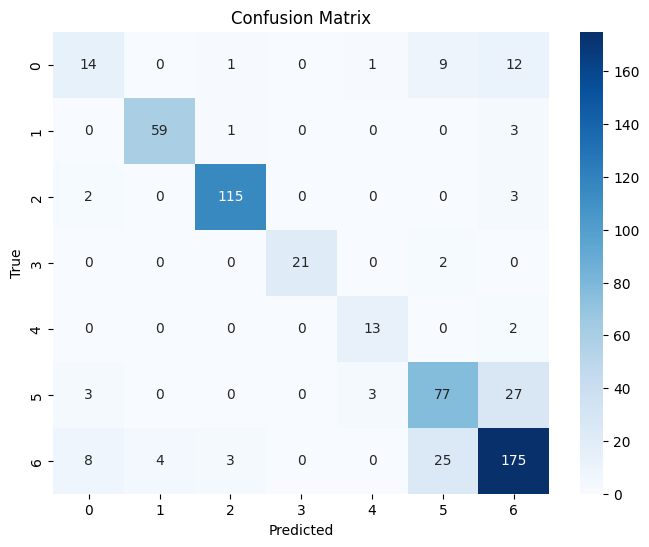

In [80]:
## results
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Results and future work

In [ ]:
# As we can see that the modal is crealrly overfitting and it is biased towards the other faults class which had more data points when compared to other classes , hence we need to
# handle this seperatly either by upsampling (either by duplicating or smote) to increase the datapoints from other classes or use down sampling methods. 
# We can also use sampling techniques to pick random samples from each class so the data caterogy is equally distributed